In [472]:
import scipy.io as sio
import numpy
# matFile 读取
matFile = 'usps_all.mat'
datas = sio.loadmat(matFile)
import torch
import torch.utils.data as Data
from torch.nn import functional as F
import torch.nn as nn

# 数据处理

In [ ]:
data = datas['data']
data = torch.Tensor(data)
train_data = data[:,:1000,:]
test_data = data[:,1000:,:]
# test_data.size()
train_data = train_data.reshape(16,16,-1)
test_data = test_data.reshape(16,16,-1)
# import matplotlib.pyplot as plt #画图
# plt.imshow(train_data[:,:,2])
train_data = train_data.permute(2,1,0)
test_data = test_data.permute(2,1,0)
train_data = Data.TensorDataset(train_data,((torch.arange(10000)+1)%10)) #range()
test_data = Data.TensorDataset(test_data,((torch.arange(1000)+1)%10))
train_data_loader = Data.DataLoader(train_data, batch_size = 10 , shuffle = True)
test_data_loader = Data.DataLoader(test_data, batch_size = 10 , shuffle = True)

# 数据集检查

torch.Size([10, 16, 16])


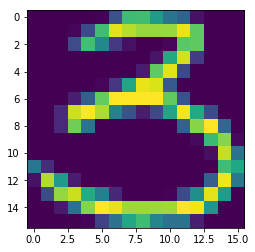

In [439]:
import matplotlib.pyplot as plt #画图
for x,y in train_data_loader:
    print(x.size())
    plt.imshow(x[1,:,:])
    break

# 模型

In [479]:
class Linear(nn.Module):

    def __init__(self):
        super(Linear,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

            
    def forward(self,x):
        x = self.flatten(x)
        y = self.linear_relu_stack(x)
        return y



class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn = nn.LSTM(
            input_size=16,
            hidden_size=64,
            num_layers=1,
            batch_first=True  # (batch, time_step, input_size)
        )
        self.linear1 = nn.Linear(64,32)
        self.linear2 = nn.Linear(32,10)
        self.relu = nn.ReLU()
#         self.drop = nn.Dropout(p=0.5)
        
    
    def forward(self,x):
#         ,h_n = self.rnn(x)
#         h_n = self.drop(h_n)
#         h_n = self.linear1(self.relu(h_n))
#         out = self.linear2(self.relu(h_n))
        r_out, (h_n, h_c) = self.rnn(x, None)
#         out = self.out(r_out[:, -1, :])
        out = self.relu(self.linear1(r_out[:, -1, :]))
        out = self.relu(self.linear2(out))
        return out
        
        
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1), #stride 步长
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, 3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc = nn.Sequential(
            nn.Linear(16*4*4, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self,x):
        feature = self.conv(x.unsqueeze(dim=1))
        y_hat = self.fc(feature.view(x.shape[0], -1))
        return y_hat


In [ ]:
def train(model):
    for epoch in range(10):
        myloss = 0
        for step,(x,y) in enumerate(train_data_loader):
            optimizer.zero_grad()
            y_hat = model(x)
            loss = loss_func(y_hat,y)
            loss.backward()
            optimizer.step()
            myloss += loss.item()
#             print(Correct_rate(model,train_data_loader))
        train_accurancy = Correct_rate(model,train_data_loader)
        test_acurancy = Correct_rate(model,test_data_loader)
        print('epoch',epoch,'| loss: %.4f'% (myloss/10000),'| train_accurancy: %.4f' %(train_accurancy/10000),'| test_acurancy: %.4f' %(test_acurancy/1000))

            
def Correct_rate(model,dataloader): # 正确率   
        accurancy = 0
        for x,y in dataloader:
            output = model(x)
            accurancy += (output.argmax(1) == y).sum().item()
        return accurancy

# 训练全连接神经网络

In [379]:
model1 = Linear()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()  # softmax, 输出每个类别的概率

In [400]:
train(model1) 

epoch 0 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 1 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 2 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 3 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 4 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 5 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 6 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 7 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 8 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740
epoch 9 | loss: 0.0722 | train_accurancy: 0.6926 | test_acurancy: 0.6740


# 训练CNN

In [381]:
model2 = CNN()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()  # softmax, 输出每个类别的概率

In [382]:
train(model2)

epoch 0 | loss: 0.0276 | train_accurancy: 0.9762 | test_acurancy: 0.9610
epoch 1 | loss: 0.0080 | train_accurancy: 0.9839 | test_acurancy: 0.9720
epoch 2 | loss: 0.0058 | train_accurancy: 0.9792 | test_acurancy: 0.9650
epoch 3 | loss: 0.0051 | train_accurancy: 0.9944 | test_acurancy: 0.9850
epoch 4 | loss: 0.0038 | train_accurancy: 0.9952 | test_acurancy: 0.9810
epoch 5 | loss: 0.0031 | train_accurancy: 0.9962 | test_acurancy: 0.9820
epoch 6 | loss: 0.0032 | train_accurancy: 0.9909 | test_acurancy: 0.9820
epoch 7 | loss: 0.0033 | train_accurancy: 0.9838 | test_acurancy: 0.9740
epoch 8 | loss: 0.0028 | train_accurancy: 0.9926 | test_acurancy: 0.9780
epoch 9 | loss: 0.0025 | train_accurancy: 0.9929 | test_acurancy: 0.9810


# 训练RNN

In [480]:
model3 = RNN()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()  # softmax, 输出每个类别的概率

In [481]:
train(model3)

epoch 0 | loss: 0.1619 | train_accurancy: 0.5948 | test_acurancy: 0.5700
epoch 1 | loss: 0.1148 | train_accurancy: 0.6734 | test_acurancy: 0.6510
epoch 2 | loss: 0.1054 | train_accurancy: 0.6995 | test_acurancy: 0.6830
epoch 3 | loss: 0.0989 | train_accurancy: 0.7281 | test_acurancy: 0.7040
epoch 4 | loss: 0.0950 | train_accurancy: 0.7332 | test_acurancy: 0.7090
epoch 5 | loss: 0.0920 | train_accurancy: 0.7384 | test_acurancy: 0.7280
epoch 6 | loss: 0.0887 | train_accurancy: 0.7623 | test_acurancy: 0.7450
epoch 7 | loss: 0.0870 | train_accurancy: 0.7390 | test_acurancy: 0.7230
epoch 8 | loss: 0.0846 | train_accurancy: 0.7790 | test_acurancy: 0.7490
epoch 9 | loss: 0.0821 | train_accurancy: 0.7884 | test_acurancy: 0.7500
